In [1]:
import pandas as pd


In [3]:
df=pd.read_excel("./kospi.xlsx",usecols=[0,1,2,3,4],index_col='Date')
df.head(1)

,Close,Open,High,Low
Date,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59


In [5]:
#  변동이라는 파생변수
df['change']=df['High']-df['Low']
df.head(1)

,Close,Open,High,Low,change
Date,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59


In [9]:
# 전일 변동이라는 파생변수
df['전일변동']=df['change'].shift(1)
df.head(5)

,Close,Open,High,Low,change,전일변동
Date,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32


In [12]:
# 목표가 = 시가 + 전일변동*0.5
df['목표가']= df['Open']+ df['전일변동']*0.5
df.head(10)

,Close,Open,High,Low,change,전일변동,목표가
Date,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330
2000-01-11,981.33,992.17,1005.87,981.23,24.64,29.92,1007.130
2000-01-12,955.01,957.98,976.86,949.20,27.66,24.64,970.300
2000-01-13,951.05,955.06,960.73,939.25,21.48,27.66,968.890
2000-01-14,948.03,958.82,970.59,937.75,32.84,21.48,969.560


1. 목표가 보다 고가가 높으면 목표가로 매수
2. 수익률 -> 종가 - 목표가 / 목표가 +1

In [33]:
data=df.loc[df['목표가']<df['High']]
data.head(10)

,Close,Open,High,Low,change,전일변동,목표가
Date,,,,,,,
2000-01-12,955.01,957.98,976.86,949.20,27.66,24.64,970.300
2000-01-14,948.03,958.82,970.59,937.75,32.84,21.48,969.560
2000-01-17,983.27,962.67,986.09,950.75,35.34,32.84,979.090
2000-01-24,926.77,917.93,944.31,915.70,28.61,30.37,933.115
2000-01-27,909.23,888.27,912.49,879.00,33.49,26.61,901.575
2000-01-28,941.67,922.74,943.95,911.12,32.83,33.49,939.485
2000-01-31,943.88,924.83,948.84,922.92,25.92,32.83,941.245
2000-02-02,943.59,929.69,950.13,923.40,26.73,35.79,947.585
2000-02-07,973.13,953.23,982.03,951.31,30.72,24.89,965.675


In [43]:
buy=0
sell=0
rtn=1
acc_rtn=1
data['수익율']=''
data['누적수익율']=''

for i in data.index:
    buy=data.loc[i,'목표가']
    sell=data.loc[i,'Close']
    #print(buy,sell)
    rtn = (sell-buy)/buy +1
    data.loc[i,'수익율']= rtn
    acc_rtn= acc_rtn *rtn
    data.loc[i,'누적수익율']=acc_rtn
    
print(acc_rtn)
data


C:\Users\dgh06\AppData\Local\Temp\ipykernel_34780\2580926592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['수익율']=''
C:\Users\dgh06\AppData\Local\Temp\ipykernel_34780\2580926592.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['누적수익율']=''


5.234682156647384


,Close,Open,High,Low,change,전일변동,목표가,수익율,누적수익율
Date,,,,,,,,,
2000-01-12,955.01,957.98,976.86,949.20,27.66,24.64,970.300,0.984242,0.984242
2000-01-14,948.03,958.82,970.59,937.75,32.84,21.48,969.560,0.977794,0.962386
2000-01-17,983.27,962.67,986.09,950.75,35.34,32.84,979.090,1.004269,0.966495
2000-01-24,926.77,917.93,944.31,915.70,28.61,30.37,933.115,0.9932,0.959923
2000-01-27,909.23,888.27,912.49,879.00,33.49,26.61,901.575,1.008491,0.968073
...,...,...,...,...,...,...,...,...,...
2021-08-03,3237.14,3221.57,3237.14,3213.20,23.94,29.04,3236.090,1.000324,5.228951
2021-08-04,3280.38,3246.65,3283.14,3237.55,45.59,23.94,3258.620,1.006678,5.263868
2021-08-09,3260.42,3258.10,3275.15,3251.74,23.41,26.24,3271.220,0.996698,5.246489


In [46]:
import numpy as np

In [50]:
# np.where(조건식, 참인경우, 거짓인 경우)
df['수익율']=np.where(df['High']>=df["목표가"], (df["Close"]-df["목표가"])/df["목표가"]+1,1)


In [51]:
# 누적 수익율
# 누적곱-> cumprod()
df['누적수익율']=df['수익율'].cumprod()

In [52]:
df

,Close,Open,High,Low,change,전일변동,목표가,수익율,누적수익율
Date,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.000000,1.000000
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.000000,1.000000
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.000000,1.000000
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.000000,1.000000
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280


In [57]:
## CAGR--> 연복리 수익율
## 누적수익율 **(1/(투자기간/365)) -1
## 시계열데이터를 이용하여 기간

delta=df.index[-1]-df.index[0]
delta.days

7906

In [59]:
year = delta.days/365
CAGR=df['누적수익율'].iloc[-1]**(1/year)-1
print('CAGR: ',CAGR*100)

CAGR:  7.941722848934241


In [62]:
# 변동성돌파전략의 누적 수익율 라인그래프로 표시
# 바이앤홀드 누적수익율 라인 그래프 표시

In [90]:
import platform
import matplotlib.pyplot as plt
# 그래프에서 한글 깨짐 방지
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')


<function matplotlib.pyplot.show(close=None, block=None)>

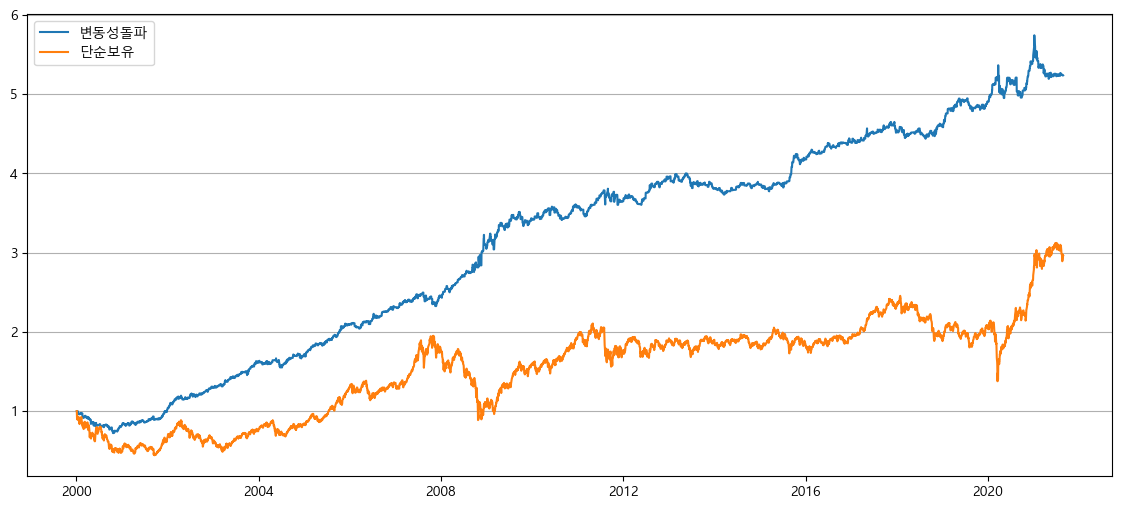

In [113]:
plt.figure(figsize=(14,6))
plt.grid(True,axis='y')
plt.plot(df['누적수익율'],label='변동성돌파')
plt.plot(df['Close']/df['Close'].iloc[0],label='단순보유')
plt.legend()
plt.show




In [100]:
#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)


In [99]:
# DD = (1-누적수익율/전고점)*100         draw down
df['전고점']= df['누적수익율'].cummax()
df['DD']=(1-df['누적수익율']/df['전고점']) * 100
df.tail()

,Close,Open,High,Low,change,전일변동,목표가,수익율,누적수익율,전고점,DD
Date,,,,,,,,,,,
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,5.739762,8.754419
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,5.739762,8.754419
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,5.739762,8.754419
2021-08-26,3128.53,3151.30,3159.37,3121.04,38.33,36.75,3169.675,1.000000,5.237280,5.739762,8.754419
2021-08-27,3133.90,3116.29,3143.01,3106.97,36.04,38.33,3135.455,0.999504,5.234682,5.739762,8.799672


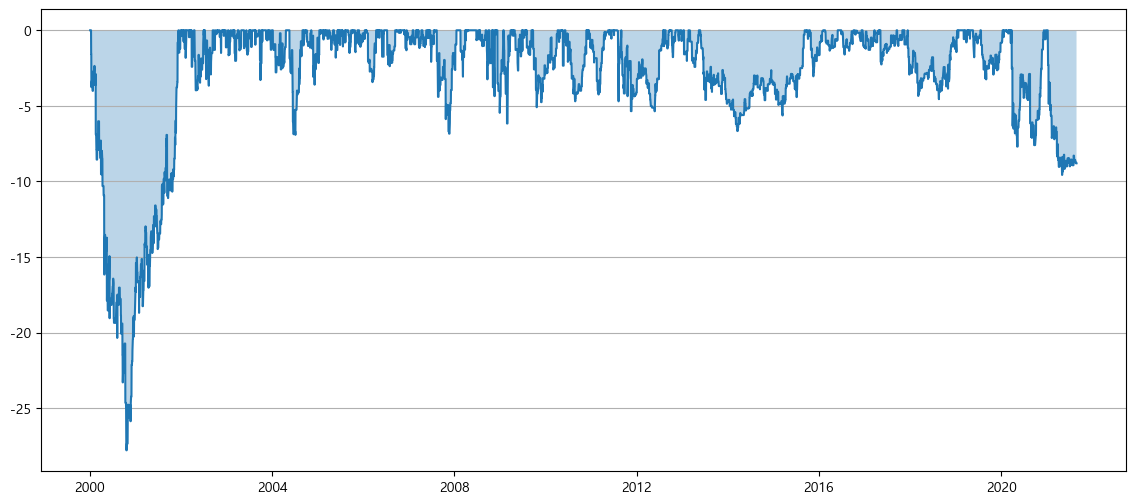

In [102]:
plt.figure(figsize=(14,6))
plt.grid(True,axis='y')
plt.plot(-df['DD'])
#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)
plt.fill_between(df.index,-df['DD'],alpha=0.3)
plt.show()

In [103]:
print("MDD : ",df['DD'].max())

MDD :  27.779726849588627


In [106]:
# 이동평균선 10일치
df['MA10'] = df['Close'].rolling(10).mean()
df.iloc[9:15]

,Close,Open,High,Low,change,전일변동,목표가,수익율,누적수익율,전고점,DD,MA10
Date,,,,,,,,,,,,
2000-01-17,983.27,962.67,986.09,950.75,35.34,32.84,979.090,1.004269,0.966495,1.0,3.350535,976.072
2000-01-18,981.53,992.31,992.85,967.96,24.89,35.34,1009.980,1.000000,0.966495,1.0,3.350535,968.321
2000-01-19,938.78,969.31,977.00,938.74,38.26,24.89,981.755,1.000000,0.966495,1.0,3.350535,963.568
2000-01-20,945.90,927.12,945.90,906.26,39.64,38.26,946.250,1.000000,0.966495,1.0,3.350535,962.079
2000-01-21,925.16,928.55,942.20,911.83,30.37,39.64,948.370,1.000000,0.966495,1.0,3.350535,959.730
2000-01-24,926.77,917.93,944.31,915.70,28.61,30.37,933.115,0.993200,0.959923,1.0,4.007733,953.683


In [107]:
df["매매신호"]= df['Open'] >df['MA10'].shift(1)

In [108]:
df.head()

,Close,Open,High,Low,change,전일변동,목표가,수익율,누적수익율,전고점,DD,MA10,매매신호
Date,,,,,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.0,1.0,1.0,0.0,NaN,False
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.0,1.0,1.0,0.0,NaN,False
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.0,1.0,1.0,0.0,NaN,False
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.0,1.0,1.0,0.0,NaN,False
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.0,1.0,1.0,0.0,NaN,False


In [109]:
# 수익율 계산 방법 -> 매매신호가 1이고 , 고가가 목표가보다 높은 경우(목표가 구입 종가 판매)
df['수익율2']=np.where(
    ((df['매매신호']==1) & (df['High']>=df['목표가'])), df['Close']/df['목표가'],1
)

In [110]:
df['누적수익율2']=df["수익율2"].cumprod()

<function matplotlib.pyplot.show(close=None, block=None)>

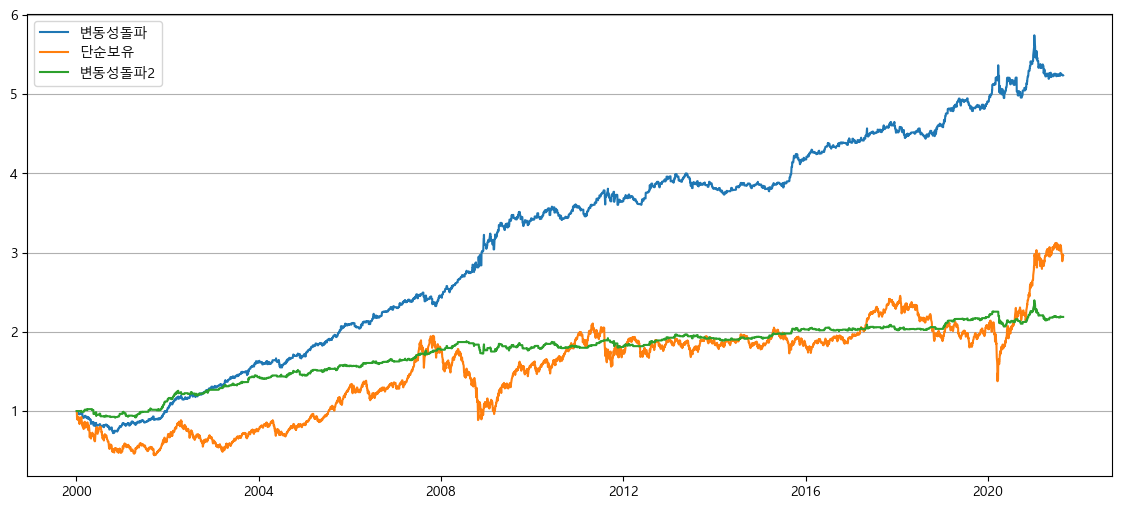

In [112]:
plt.figure(figsize=(14,6))
plt.grid(True,axis='y')
plt.plot(df['누적수익율'],label='변동성돌파')
plt.plot(df['Close']/df['Close'].iloc[0],label='단순보유')
plt.plot(df['누적수익율2'],label='변동성돌파2')
plt.legend()
plt.show


In [114]:
# DD = (1-누적수익율/전고점)*100         draw down
df['전고점2']= df['누적수익율2'].cummax()
df['DD2']=(1-df['누적수익율2']/df['전고점2']) * 100
df.tail()

,Close,Open,High,Low,change,전일변동,목표가,수익율,누적수익율,전고점,DD,MA10,매매신호,수익율2,누적수익율2,전고점2,DD2
Date,,,,,,,,,,,,,,,,,
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,5.739762,8.754419,3165.447,False,1.0,2.187659,2.397249,8.742933
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,5.739762,8.754419,3153.235,False,1.0,2.187659,2.397249,8.742933
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,5.739762,8.754419,3143.597,False,1.0,2.187659,2.397249,8.742933
2021-08-26,3128.53,3151.30,3159.37,3121.04,38.33,36.75,3169.675,1.000000,5.237280,5.739762,8.754419,3134.388,True,1.0,2.187659,2.397249,8.742933
2021-08-27,3133.90,3116.29,3143.01,3106.97,36.04,38.33,3135.455,0.999504,5.234682,5.739762,8.799672,3126.940,False,1.0,2.187659,2.397249,8.742933


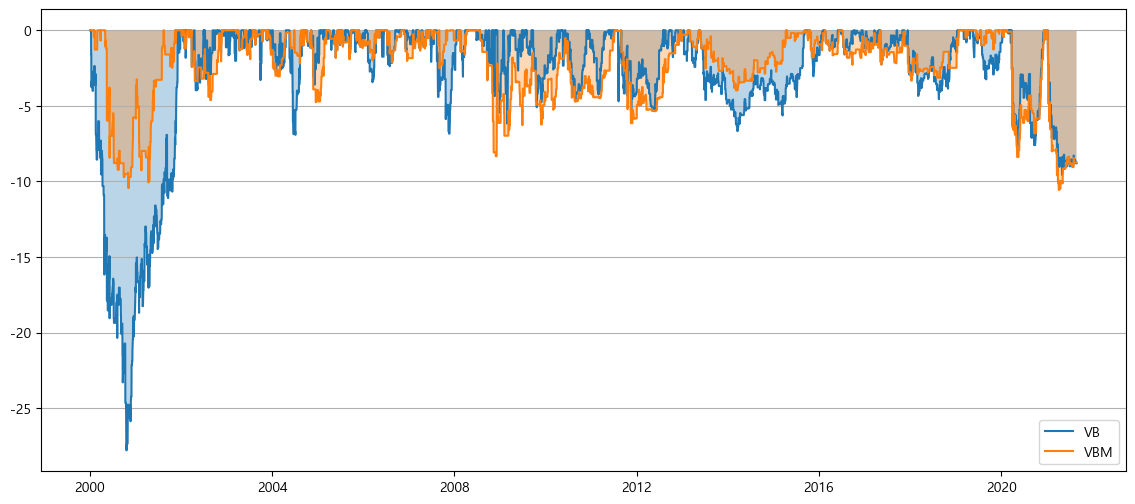

In [120]:
#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

plt.figure(figsize=(14,6))
plt.grid(True,axis='y')
plt.plot(-df['DD'],label='VB')
plt.plot(-df['DD2'],label='VBM')
plt.legend()
plt.fill_between(df.index,-df['DD'],alpha=0.3)
plt.fill_between(df.index,-df['DD2'],alpha=0.3)
plt.show()

## "Value-Based Management"

In [117]:
print("MDD2 : ",df['DD2'].max())

MDD2 :  10.556892232762005
